Alex Gagliano, 05/10/2020

Let's start by importing our required packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from astropy.time import Time
from collections import Counter

sns.set_context("talk")
sns.set_style("white")
sns.set_palette("colorblind")


plt.rcParams['xtick.major.size'] = 16
plt.rcParams['ytick.major.size'] = 16

plt.rcParams['xtick.minor.size'] = 8
plt.rcParams['ytick.minor.size'] = 8
plt.rcParams['xtick.minor.width'] = 2
plt.rcParams['ytick.minor.width'] = 2

plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

In [3]:
import numpy as np
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [4]:
#with the new Siding Spring data
#Lbol = pd.read_csv("/Users/alexgagliano/Documents/Research/2020oi/scripts/superbol/SBO_input/archive/superbol_output_2020oi/logL_bb_2020oi_AUBgVriz.txt")
Lbol = pd.read_csv("/Users/alexgagliano/Documents/Research/2020oi/scripts/superbol/SBO_input/superbol_output_2020oi/logL_bb_2020oi_AUBgVriz.txt", delimiter='\t', header=None, names=['MJD', 'logL', 'logLerr'])

dm15_Ics = pd.read_csv("/Users/alexgagliano/Documents/Research/2020oi/data/derived_data/Lyman_dm15.txt", delim_whitespace=True)

In [5]:
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [6]:
Lbol_20oi = 10**Lbol['logL'].values

d = 17.1e6*3.086e18 #17.1 Mpc to cm
dsol = 1.485e13 #cm

L20oi_distcorr = Lbol_20oi*(14./17.1)**2 #erg/s
L20oi = Lbol_20oi #erg/s

Lsol = 3.83e33 # erg/s  #/cm^2
Msol = 4.77

M20oi_distcorr = -2.5*np.log10(L20oi_distcorr/Lsol) + Msol
M20oi = -2.5*np.log10(L20oi/Lsol) + Msol

#error propagation from bolometric LC
M20oi_distcorr_err = 0.434*Lbol['logLerr'].values/(L20oi_distcorr/Lsol)
M20oi_err = 0.434*Lbol['logLerr'].values/(L20oi/Lsol)

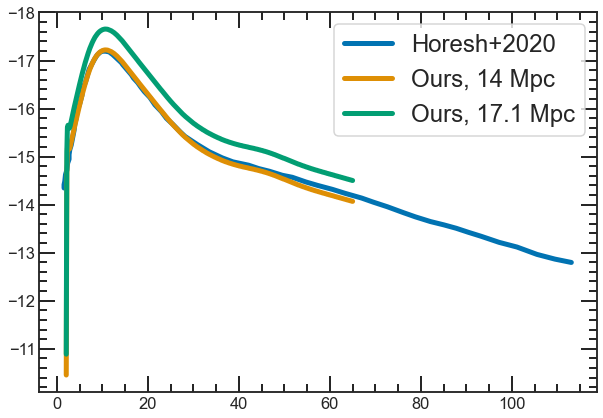

In [7]:
Mbol_20oi_theirs = pd.read_csv("/Users/alexgagliano/Documents/Research/2020oi/data/reference_data/Digitized_2020oiLbol_OtherPaper.csv", header=None, names=['phase(days)', 'MBol'])
t0 = 58854.2

plt.figure(figsize=(10,7))
plt.plot(Mbol_20oi_theirs['phase(days)'], Mbol_20oi_theirs['MBol']-1., label='Horesh+2020', lw=5)
plt.plot(Lbol['MJD']-t0, M20oi_distcorr, label='Ours, 14 Mpc', lw=5)
plt.plot(Lbol['MJD']-t0, M20oi, label='Ours, 17.1 Mpc', lw=5)
#plt.axvline(x=SN20oi_MJDpeak-t0, ls='--', lw=3, c='k')
plt.legend(fontsize=24)
plt.gca().invert_yaxis()

In [8]:
#get first approximation at dm15
peakM_distcorr = np.nanmin(M20oi_distcorr)
peakM = np.nanmin(M20oi)
#find_nearest(Lbol['MJD'].values, )

In [13]:
SN20oi_MJDpeak = Lbol.loc[Lbol['logL'] == np.nanmax(Lbol['logL']), 'MJD'].values[0]
MJD_m15_theor = SN20oi_MJDpeak+15

import matplotlib.pyplot as plt
from scipy import interpolate

#convert to absolute magnitude before doing this calculation!!
f_distcorr = interpolate.interp1d(Lbol['MJD'].values,M20oi_distcorr)
f = interpolate.interp1d(Lbol['MJD'].values,M20oi)
m15_bol_distcorr = f_distcorr([MJD_m15_theor])   # use interpolation function returned by `interp1d`
m15_bol = f([MJD_m15_theor])   # use interpolation function returned by `interp1d`

dm15_distcorr = m15_bol_distcorr - peakM_distcorr
dm15 = m15_bol - peakM

In [11]:
dm15_Ics

,SN,t_peak(MJD),M_peak(mag),dm15_bol(mag),class
0,1993J,49094.4,-17.5,0.96,IIb
1,1994I,49450.1,-17.3,1.37,Ic
2,1996cb,50061.2,-17.1,0.73,IIb
3,1998bw,50944.0,-19.0,0.75,Ic-BL
4,1999dn,51418.2,-16.9,0.32,Ib
5,1999ex,51499.0,-17.5,0.78,Ib
6,2002ap,52312.1,-16.9,0.57,Ic-BL
7,2003bg,52717.0,-17.5,0.54,IIb
8,2003jd,52942.5,-18.8,0.86,Ic-BL
9,2004aw,53088.6,-17.8,0.41,Ic


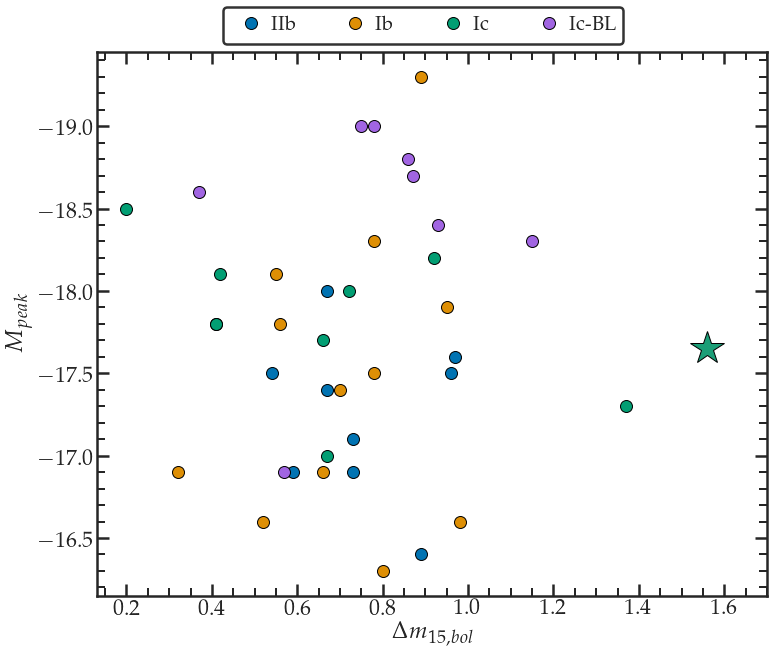

In [33]:
#1996cb 
#2003bg
#2004ff
#2006T
#2006el
#2008ax
#2011dh
#2011hs
#1999dn
#1999ex
#2004dk
#2004gq
#2005bf
#2005hg
#2006ep
#2007C
#2007Y
#2007uy
#2008D
#2009jf
#iPTF13bvn
#1994I
#2004aw
#2004dn
#2004fe
#2005az
#2005mf
#2007gr
#2011bm
#1998bw
#2002ap
#2003jd
#2005kz
#2006aj
#2007ru
#2009bb
#2010bh

plt.figure(figsize=(12,10))
sns.set_context("poster")
i = -1
x_shifts = {}
y_shifts = {}
for SNname in np.unique(dm15_Ics['SN']):
    x_shifts[SNname] = -0.01
    y_shifts[SNname] = 0.1
    
#update for a few specific SN
x_shifts['1998bw'] = -0.12 
y_shifts['1998bw'] = -0.2
x_shifts['1996cb'] = 0.
y_shifts['1996cb'] = 0.01
x_shifts['2002ap'] = -0.14
y_shifts['2002ap'] = -0.03
x_shifts['1999dn'] = -0.05
y_shifts['199dn'] = 0.1
x_shifts['2007Y'] = -0.11
y_shifts['2007Y'] = -0.08
x_shifts['2004aw'] = -0.1
y_shifts['2004aw'] = 0.1


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
## for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
    
    
for k in np.arange(len(np.unique(dm15_Ics['class'].values))):
    SNtype = np.unique(dm15_Ics['class'].values)[k]
    dm15_Ics_type = dm15_Ics[dm15_Ics['class']==SNtype]
    if k==3:
        c = '#A165E2'
    else:
        c = sns.color_palette("colorblind")[k]
    plt.plot(dm15_Ics_type['dm15_bol(mag)'], dm15_Ics_type['M_peak(mag)'],  'o', label="%s"%SNtype, mec='k', c=c)
    i +=1
    for idx, row in dm15_Ics_type.iterrows():
        SNname = row['SN'][-4:]
        if SNname == '3bvn':
            SNname = row['SN'][-5:]
        elif (SNname == '994I') | (SNname == '993J') | (SNname == '007C') | (SNname == '008D') | (SNname == '007Y'):
            SNname = row['SN'][-3:]
      #  if SNtype == 'Ib':
          #  plt.text(row['dm15_bol(mag)']+x_shifts[row['SN']], row['M_peak(mag)']+y_shifts[row['SN']], SNname, fontsize=18)
#plt.plot(dm15_distcorr, [peakM_distcorr],'d', ms=10, label='Horesh+20', c=sns.color_palette("Dark2")[0], mec='k')
plt.plot(dm15, [peakM], '*', ms=35, c=sns.color_palette("Dark2")[0], mec='k')

#plt.text(1.55, -17.5, "20oi",fontsize=20)

plt.xlim(xmax=1.7)
plt.gca().invert_yaxis()
plt.ylabel(r"$M_{peak}$")
plt.xlabel(r"$\Delta m_{15,bol}$")
leg = plt.legend(fontsize=20,loc='lower right', handletextpad=0.0, borderaxespad=1.5,labelspacing=0.5, bbox_to_anchor=(0.83,0.96), ncol=4,frameon=True, fancybox=True, edgecolor='k')
leg.get_frame().set_linewidth(2.5)

plt.savefig("/Users/alexgagliano/Documents/Research/2020oi/img/dm15_noText_FancyFont.png",dpi=200, bbox_inches='tight')

In [358]:
dm15

array([1.63338339])

In [363]:
np.median(dm15_Ics.loc[dm15_Ics['class']=='Ic', 'dm15_bol(mag)'].values)

0.665

In [379]:
dm15_Ics.loc[dm15_Ics['SN']=='1994I']

,SN,t_peak(MJD),M_peak(mag),dm15_bol(mag),class
1,1994I,49450.1,-17.3,1.37,Ic
